In [1]:
import numpy as np
#np.load.__defaults__=(None, False, True, 'ASCII')

In [2]:
from keras.datasets import imdb
(train_data,train_label),(test_data,test_label) = imdb.load_data(num_words=10000)

Using TensorFlow backend.
F:\ANACONDA\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
F:\ANACONDA\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
F:\ANACONDA\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
F:\ANACONDA\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as

In [3]:
train_data_1 = train_data
train_label_1 = train_label
test_data_1 = test_data
test_label_1= test_label

In [4]:
(train_data_1).shape

(25000,)

In [5]:
def one_hot_encoding(sequence,dimensions=10000):
    b = np.zeros((len(sequence),dimensions))
    for k, l in enumerate(sequence):
        b[k, l] = 1.
        #for i in range(dimensions):
         #   b[k,int(l[i])] = 1.
            #print(k,int(l[i]))
    return b

In [7]:
train_data = one_hot_encoding(train_data)
test_data = one_hot_encoding(test_data)

In [8]:
train_label = np.asarray(train_label).astype('float32')
test_label = np.asarray(test_label).astype('float32')

## Creating validation set

In [13]:
training_set = train_data[10000:]
validation_set = train_data[:10000]
training_label_set = train_label[10000:]
validation_label_set = train_label[:10000]

## Till now data is ready for feeding the nerwork

In [53]:
from keras import layers
from keras import models

In [54]:
network = models.Sequential()
network.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
network.add(layers.Dense(16,activation='relu'))
network.add(layers.Dense(1,activation='sigmoid'))

In [55]:
from keras import optimizers
from keras import losses
from keras import metrics
network.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

In [56]:
history= network.fit(training_set,training_label_set,epochs=20,batch_size=512,validation_data=(validation_set,validation_label_set))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s - loss: 0.4999 - binary_accuracy: 0.7928 - val_loss: 0.3786 - val_binary_accuracy: 0.8610
Epoch 2/20
15000/15000 [==============================] - 4s - loss: 0.3001 - binary_accuracy: 0.9033 - val_loss: 0.3014 - val_binary_accuracy: 0.8882
Epoch 3/20
15000/15000 [==============================] - 4s - loss: 0.2213 - binary_accuracy: 0.9293 - val_loss: 0.2975 - val_binary_accuracy: 0.8793
Epoch 4/20
15000/15000 [==============================] - 4s - loss: 0.1754 - binary_accuracy: 0.9445 - val_loss: 0.2740 - val_binary_accuracy: 0.8911
Epoch 5/20
15000/15000 [==============================] - 4s - loss: 0.1432 - binary_accuracy: 0.9547 - val_loss: 0.2815 - val_binary_accuracy: 0.8881
Epoch 6/20
15000/15000 [==============================] - 4s - loss: 0.1180 - binary_accuracy: 0.9635 - val_loss: 0.2952 - val_binary_accuracy: 0.8861
Epoch 7/20
15000/15000 [====================

In [57]:
#from keras.callbacks import History
history_dict = history.history

In [58]:
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

In [59]:
tran_loss = history_dict['loss']
tran_acc = history_dict['binary_accuracy']
val_loss = history_dict['val_loss']
val_acc = history_dict['val_binary_accuracy']

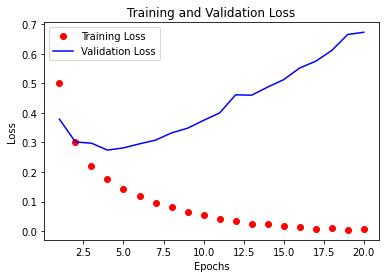

In [70]:
import matplotlib.pyplot as plt
epochs = range(1,len(val_acc)+1)
plt.plot(epochs,tran_loss,'ro',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

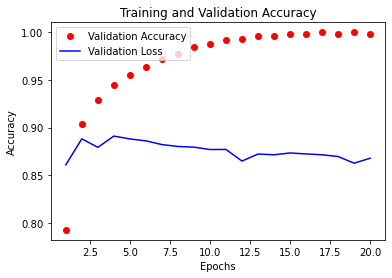

In [69]:
plt.plot(epochs,tran_acc,'ro',label='Validation Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')
plt.show()

In [71]:
loss, accurcy=network.evaluate(test_data,test_label)

25000/25000 [==============================] - 15s    


In [72]:
print(loss,accurcy)

0.7366489304506779 0.85168


In [73]:
network.predict(validation_set[1:5])

array([[1.7027177e-06],
       [3.7637597e-07],
       [1.0000000e+00],
       [5.0109197e-06]], dtype=float32)